**IRIS FLOWER CLASSIFICATION**

Import necessary files

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Dataset Load

In [ ]:
data = pd.read_csv('IRIS.csv')

Viewing dataset

In [ ]:
data.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [ ]:
data.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [ ]:
data.shape

(150, 5)

**Data Cleaning**

checking null values


In [ ]:
data.isnull().sum()

,0
sepal_length,0
sepal_width,0
petal_length,0
petal_width,0
species,0


In [ ]:
#Checking Duplicate values
data.duplicated().sum()

3

In [ ]:
data = data.drop_duplicates()

In [ ]:
data.duplicated().sum()

0

In [ ]:
data.shape

(147, 5)

In [ ]:
data


,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


**Exploratory Data Analysis**

In [ ]:
data.species.unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [ ]:
data['species'].value_counts()

,count
species,
Iris-versicolor,50
Iris-virginica,49
Iris-setosa,48


**Visualizing data**

<ipython-input-62-f5790e009652>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="species", data=data, palette="Dark2")


<Axes: xlabel='species', ylabel='count'>

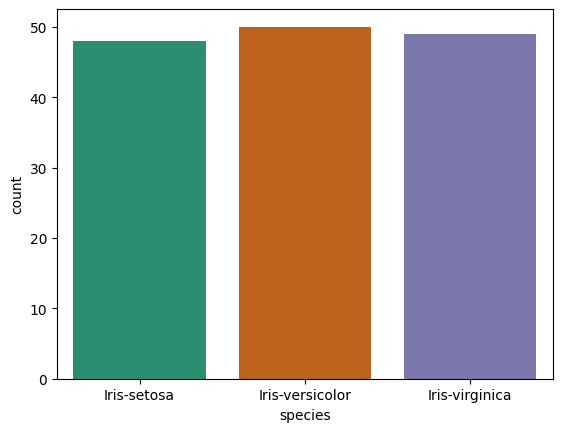

In [ ]:
sns.countplot(x="species", data=data, palette="Dark2")

Text(0, 0.5, 'Frequency')

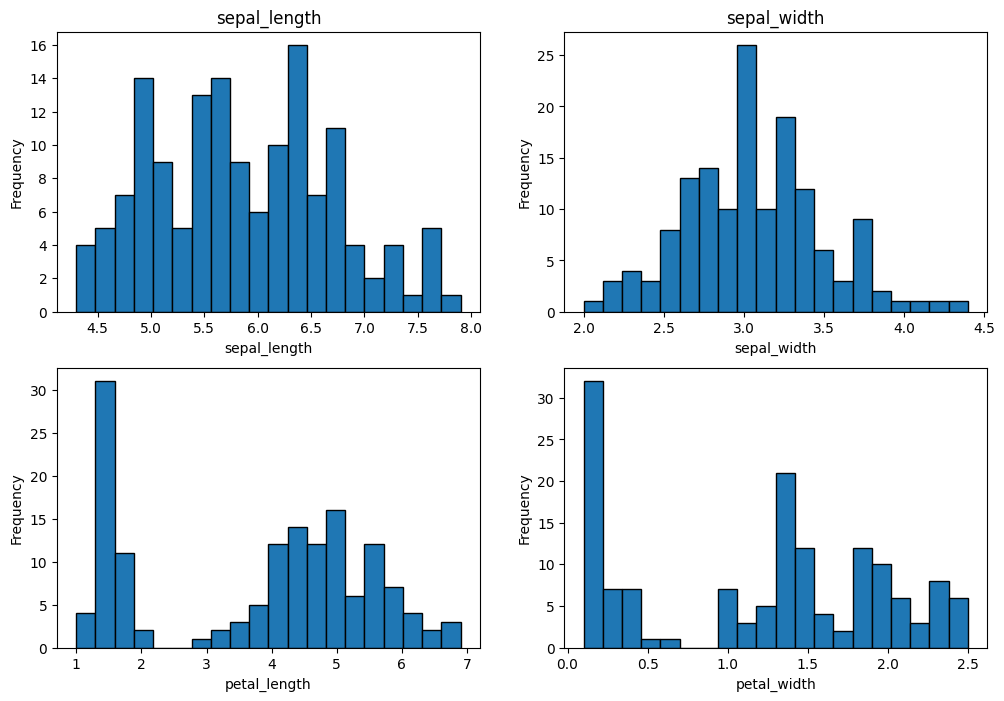

In [ ]:
#Histogram
fig,ax = plt.subplots(2,2, figsize=(12,8))

ax[0,0].hist(data['sepal_length'], bins=20, edgecolor='black')
ax[0,0].set_xlabel('sepal_length')
ax[0,0].set_ylabel('Frequency')
ax[0,0].set_title('sepal_length')

ax[0,1].hist(data['sepal_width'], bins=20, edgecolor='black')
ax[0,1].set_xlabel('sepal_width')
ax[0,1].set_ylabel('Frequency')
ax[0,1].set_title('sepal_width')

ax[1,0].hist(data['petal_length'], bins=20, edgecolor='black')
ax[1,0].set_xlabel('petal_length')
ax[1,0].set_ylabel('Frequency')

ax[1,1].hist(data['petal_width'], bins=20, edgecolor='black')
ax[1,1].set_xlabel('petal_width')
ax[1,1].set_ylabel('Frequency')


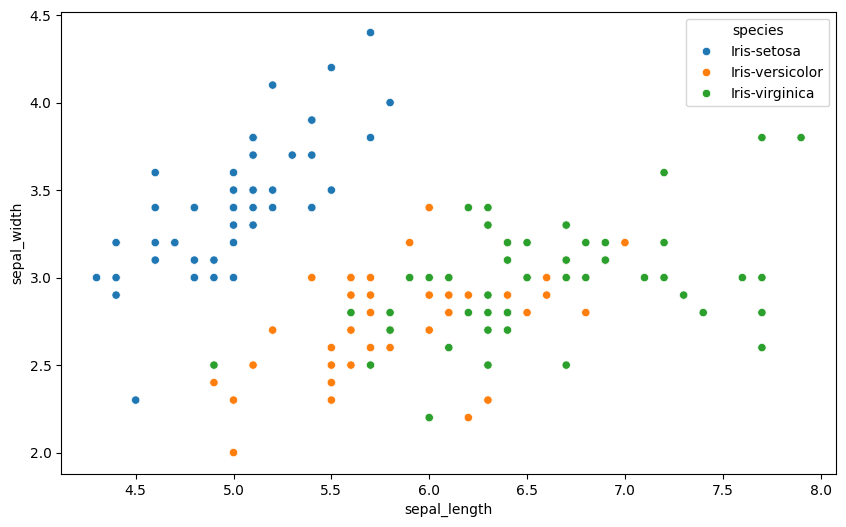

In [ ]:
#Scatter plot
fig,ax = plt.subplots(figsize=(10,6))
sns.scatterplot(x="sepal_length", y="sepal_width", hue="species", data=data)
plt.show()

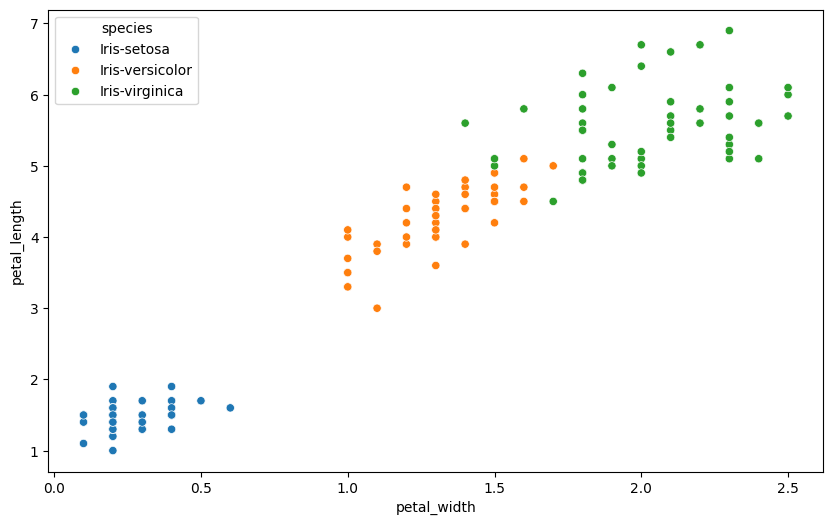

In [ ]:
#Scatter plot
fig,ax = plt.subplots(figsize=(10,6))
sns.scatterplot(x="petal_width", y="petal_length", hue="species", data=data)
plt.show()

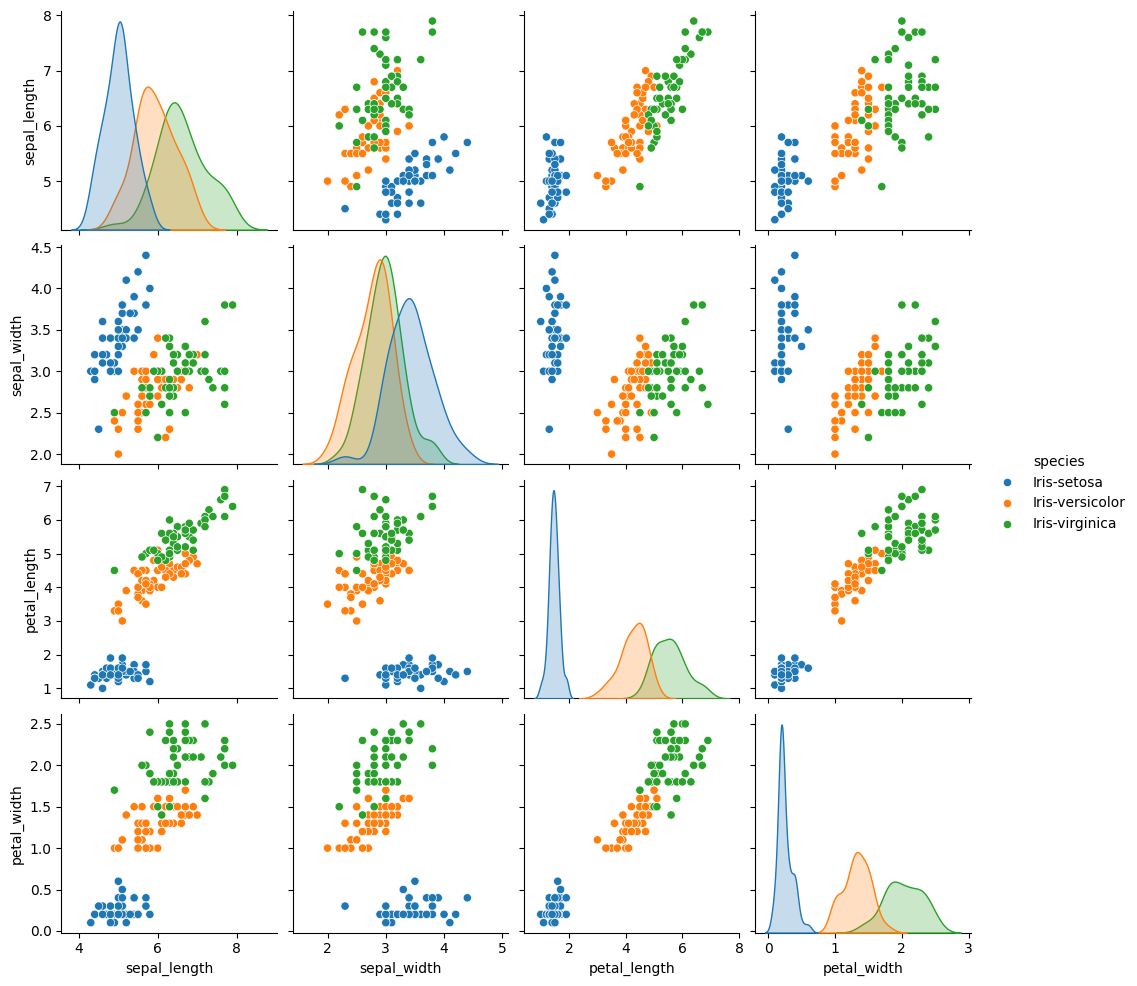

In [ ]:
sns.pairplot(data, hue='species')

<Axes: xlabel='species', ylabel='sepal_width'>

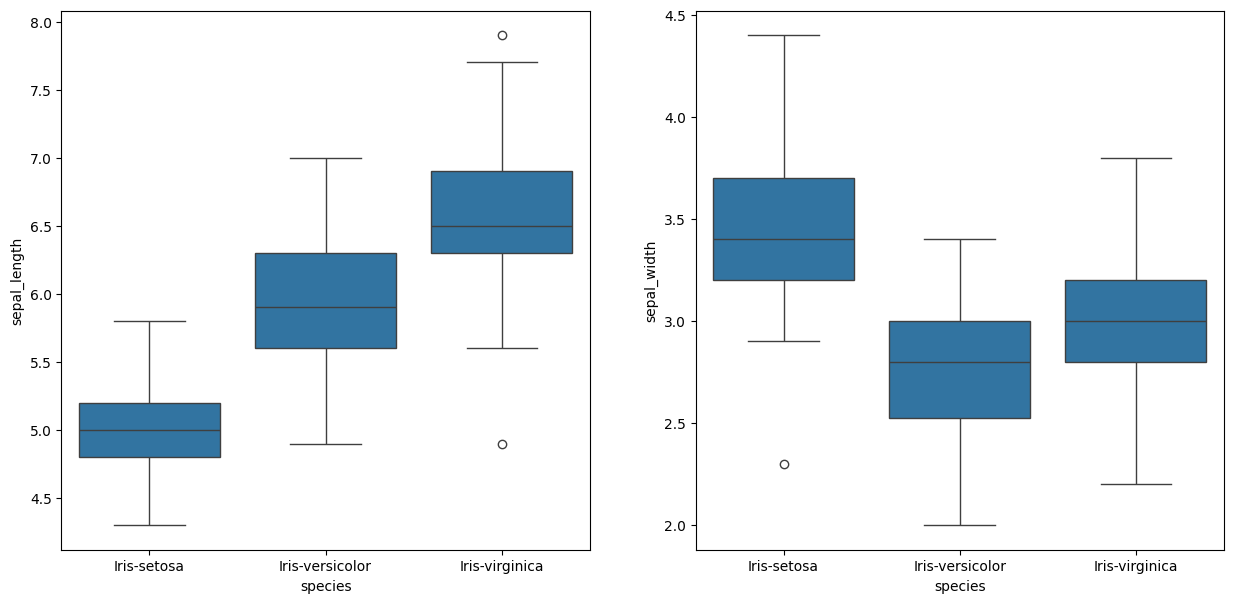

In [ ]:
#Box Plot
fig,ax = plt.subplots(1,2, figsize=(15,7))
sns.boxplot(x="species", y="sepal_length", data=data, ax=ax[0])
sns.boxplot(x="species", y="sepal_width", data=data, ax=ax[1])

<Axes: >

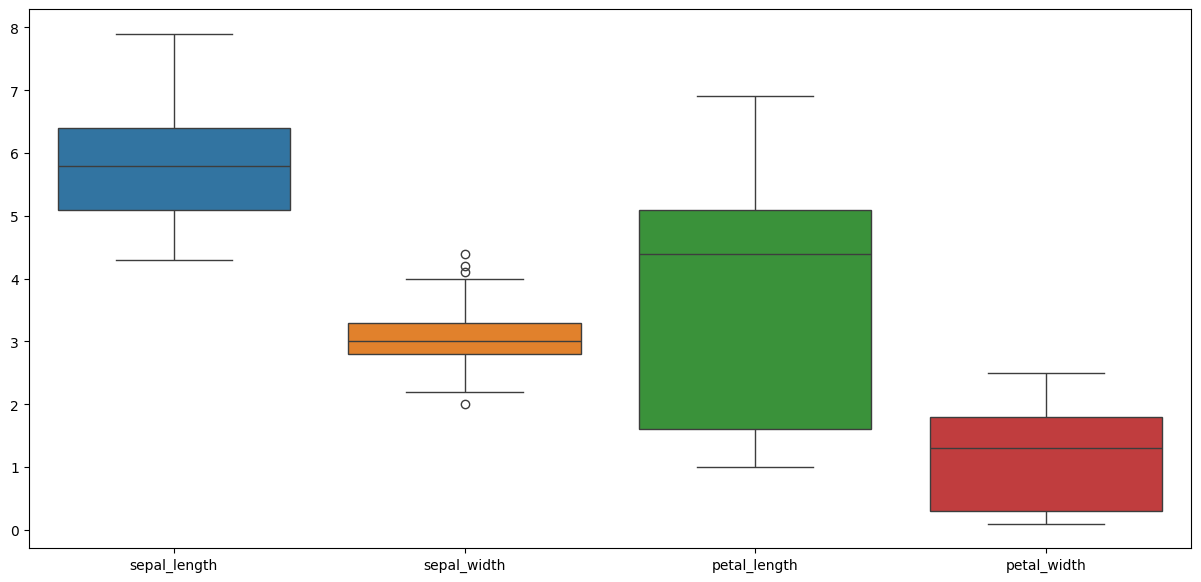

In [ ]:
#Boxplot
fig,ax = plt.subplots(figsize=(15,7))
sns.boxplot(data,ax=ax)

**FEATURE ENGINEERING**

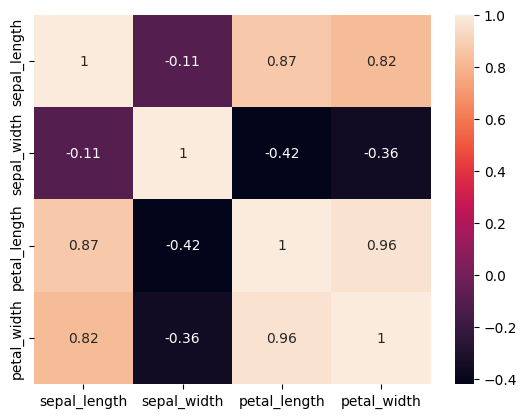

In [ ]:
fig, ax=plt.subplots()
sns.heatmap(data.drop('species', axis=1).corr(), annot=True, ax=ax)
plt.show()


In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
data['species'] = le.fit_transform(data['species'])

In [ ]:
data

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


**Data Splitting**

In [ ]:
from sklearn.model_selection import train_test_split
X= data.drop('species', axis=1)
y= data['species']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
train_data = X_train.join(y_train)
train_data

,sepal_length,sepal_width,petal_length,petal_width,species
137,6.4,3.1,5.5,1.8,2
47,4.6,3.2,1.4,0.2,0
121,5.6,2.8,4.9,2.0,2
27,5.2,3.5,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
73,6.1,2.8,4.7,1.2,1
108,6.7,2.5,5.8,1.8,2
14,5.8,4.0,1.2,0.2,0
94,5.6,2.7,4.2,1.3,1


**MODEL SELECTION**

In [ ]:
#Logistic Regression
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

fitted_model_lr = LogisticRegression()
fitted_model_lr.fit(X_train, y_train)
y_pred_lr = fitted_model_lr.predict(X_test)

In [ ]:
accuracy = accuracy_score(y_test, y_pred_lr)
print("Accuracy for Linear Regression Model:", accuracy)
classification_rep = classification_report(y_test, y_pred_lr)
print("Classification Report:\n", classification_rep)
confusion_mat = confusion_matrix(y_test, y_pred_lr)
print("Confusion Matrix:\n", confusion_mat)

Accuracy for Linear Regression Model: 0.9333333333333333
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        11
           1       0.90      0.90      0.90        10
           2       0.89      0.89      0.89         9

    accuracy                           0.93        30
   macro avg       0.93      0.93      0.93        30
weighted avg       0.93      0.93      0.93        30

Confusion Matrix:
 [[11  0  0]
 [ 0  9  1]
 [ 0  1  8]]


KNN MODEL


In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

fitted_model_knn = KNeighborsClassifier(n_neighbors=3)
fitted_model_knn.fit(X_train, y_train)
y_pred_knn = fitted_model_knn.predict(X_test)

In [ ]:
accuracy1 = accuracy_score(y_test, y_pred_knn)
print("Accuracy for KNN:", accuracy1)
classification_rep1 = classification_report(y_test, y_pred_knn)
print("Classification Report:\n", classification_rep1)
confusion_mat1 = confusion_matrix(y_test, y_pred_knn)
print("Confusion Matrix:\n", confusion_mat1)

Accuracy for KNN: 0.9333333333333333
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        11
           1       0.90      0.90      0.90        10
           2       0.89      0.89      0.89         9

    accuracy                           0.93        30
   macro avg       0.93      0.93      0.93        30
weighted avg       0.93      0.93      0.93        30

Confusion Matrix:
 [[11  0  0]
 [ 0  9  1]
 [ 0  1  8]]


In [ ]:
#Decision tree
from sklearn.tree import DecisionTreeClassifier
fitted_model_dt = DecisionTreeClassifier()
fitted_model_dt.fit(X_train, y_train)
y_pred_dt = fitted_model_dt.predict(X_test)

In [ ]:
accuracy2 = accuracy_score(y_test, y_pred_dt)
print("Accuracy for Decision tree:", accuracy2)
classification_rep2 = classification_report(y_test, y_pred_dt)
print("Classification Report:\n", classification_rep2)
confusion_mat2 = confusion_matrix(y_test, y_pred_dt)
print("Confusion Matrix:\n", confusion_mat2)

Accuracy for Decision tree: 0.9666666666666667
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        11
           1       1.00      0.90      0.95        10
           2       0.90      1.00      0.95         9

    accuracy                           0.97        30
   macro avg       0.97      0.97      0.96        30
weighted avg       0.97      0.97      0.97        30

Confusion Matrix:
 [[11  0  0]
 [ 0  9  1]
 [ 0  0  9]]


In [ ]:
#Random Forest
from sklearn.ensemble import RandomForestClassifier
fitted_model_rf = RandomForestClassifier()
fitted_model_rf.fit(X_train, y_train)
y_pred_rf = fitted_model_rf.predict(X_test)

In [ ]:
accuray3 = accuracy_score(y_test, y_pred_rf)
print("Accuracy for Random Forest:", accuray3)
classification_rep3 = classification_report(y_test, y_pred_rf)
print("Classification Report:\n", classification_rep3)
confusion_mat3 = confusion_matrix(y_test, y_pred_rf)
print("Confusion Matrix:\n", confusion_mat3)


Accuracy for Random Forest: 0.9333333333333333
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        11
           1       0.90      0.90      0.90        10
           2       0.89      0.89      0.89         9

    accuracy                           0.93        30
   macro avg       0.93      0.93      0.93        30
weighted avg       0.93      0.93      0.93        30

Confusion Matrix:
 [[11  0  0]
 [ 0  9  1]
 [ 0  1  8]]


**Comparison of Models using graphs**

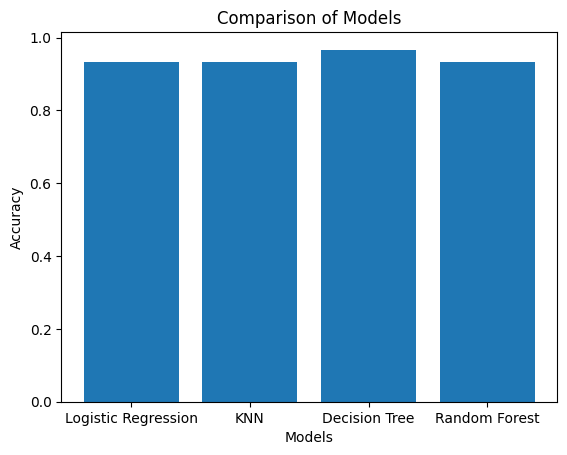

In [ ]:
models = ['Logistic Regression', 'KNN', 'Decision Tree', 'Random Forest']
accuracy_scores = [accuracy, accuracy1, accuracy2, accuray3]

fig,ax = plt.subplots()
ax.bar(models, accuracy_scores)
ax.set_xlabel('Models')
ax.set_ylabel('Accuracy')
ax.set_title('Comparison of Models')
plt.show()

User Input

In [ ]:
X = data[['sepal_length', 'sepal_width', 'petal_length', 'petal_width']]
y = data['species']

sepal_length = float(input("Enter sepal_length: "))
sepal_width = float(input("Enter sepal_width: "))
petal_length = float(input("Enter petal_length: "))
petal_width = float(input("Enter petal_width: "))

data1 = pd.DataFrame({'sepal_length': [sepal_length], 'sepal_width': [sepal_width], 'petal_length': [petal_length], 'petal_width': [petal_width]})

#Predict the flower type
flower_type = fitted_model_dt.predict(data1)[0]

#Map the output labels
flower_names = ['Iris-setosa', 'Iris-versicolor', 'Iris-virginica']
predicted_flower_name = flower_names[flower_type]
#Output
print("Predicted flower type:", predicted_flower_name)

Enter sepal_length: 5.1
Enter sepal_width: 3.5
Enter petal_length: 1.4
Enter petal_width: 0.2
Predicted flower type: Iris-setosa
